# Toxic Tweets Dataset

### A balanced dataset of tweets containing hate speech and offensive language.

<a href="https://twitter.com/"><img src="https://www.pazarlamasyon.com/wp-content/uploads/2022/2/4/twitter-dan-karakter-sinirina-cozum-getirecek-yeni-bir-ozellik.jpg" alt="Twitter"></a>


### Context:

I was working on a project to query tweets using the Twitter API, when I realized the datasets I came across were all extremely imbalanced ones. This was a huge problem for me as I needed a better dataset, so I decided to build one!

### Content: 

This dataset is a combination of various datasets which had high levels of class imbalance in them. No data was changed edited or emoved from any of the datasets to maintain the integrity of the data. Only a combination of various datasets in order to achieve balance.

### Inspiration:

<ul>
    <li>What factors lead people to judge a tweet as toxic?</li>
    <li>Build a toxicity detector</li>
    <li>Build a sentiment analyser</li>
</ul>


## Dataset:

1 - https://www.kaggle.com/ashwiniyer176/toxic-tweets-dataset

## Building Passive Aggressive Classifier to Prediction

### Importing libraries

In [1]:
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt 
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.metrics import accuracy_score, confusion_matrix

### Importing the data

In [3]:
df=pd.read_csv('FinalBalancedDataset.csv')
LABEL=df['Toxicity']
df

,Unnamed: 0,Toxicity,tweet
0,0,0,@user when a father is dysfunctional and is s...
1,1,0,@user @user thanks for #lyft credit i can't us...
2,2,0,bihday your majesty
3,3,0,#model i love u take with u all the time in ...
4,4,0,factsguide: society now #motivation
...,...,...,...
56740,56740,1,you's a muthaf***in lie &#8220;@LifeAsKing: @2...
56741,56741,1,"you've gone and broke the wrong heart baby, an..."
56742,56742,1,young buck wanna eat!!.. dat nigguh like I ain...
56743,56743,1,youu got wild bitches tellin you lies


In [4]:
LABEL

0        0
1        0
2        0
3        0
4        0
        ..
56740    1
56741    1
56742    1
56743    1
56744    0
Name: Toxicity, Length: 56745, dtype: int64

### Data Preprocessing

In [5]:
LABEL.value_counts()

0    32592
1    24153
Name: Toxicity, dtype: int64

In [6]:
df.shape

(56745, 3)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56745 entries, 0 to 56744
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  56745 non-null  int64 
 1   Toxicity    56745 non-null  int64 
 2   tweet       56745 non-null  object
dtypes: int64(2), object(1)
memory usage: 1.3+ MB


In [8]:
df.isnull().sum()

Unnamed: 0    0
Toxicity      0
tweet         0
dtype: int64

In [9]:
df.duplicated().sum()

0

### Toxic Types on Histogram

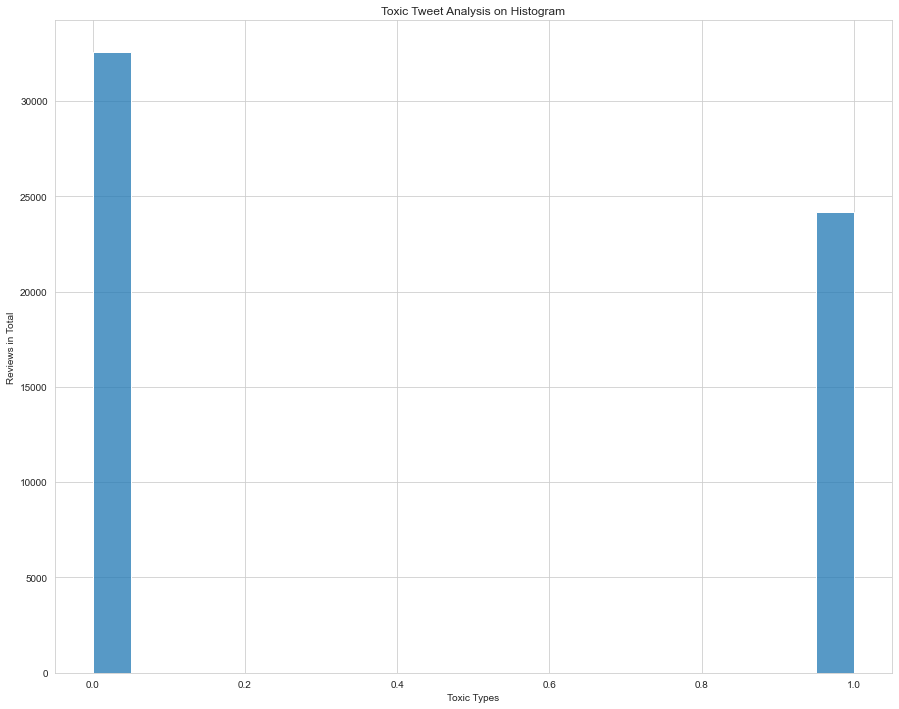

In [11]:
plt.figure(figsize = (15, 12))
sns.set_style('whitegrid')    
sns.histplot(data=LABEL)
plt.title("Toxic Tweet Analysis on Histogram")
plt.xlabel("Toxic Types")
plt.ylabel("Reviews in Total")
plt.show()

In [13]:
labels=df.Toxicity
labels.head(10)

0    0
1    0
2    0
3    0
4    0
5    0
6    0
7    0
8    0
9    0
Name: Toxicity, dtype: int64

### Train - Test Split

In [15]:
x_train, x_test, y_train, y_test=train_test_split(df['tweet'], labels, test_size=0.2, random_state=7)

### Initialize a TfidfVectorizer

In [16]:
tfidf_vectorizer = TfidfVectorizer(stop_words='english', max_df=0.7)

### Fit and transform train set, transform test set

In [17]:
tfidf_train = tfidf_vectorizer.fit_transform(x_train) 
tfidf_test = tfidf_vectorizer.transform(x_test)

### Initialize a PassiveAggressiveClassifier

The passive-aggressive algorithms are a family of algorithms for large-scale learning. They are similar to the Perceptron in that they do not require a learning rate.

To learn more check:

<ul>
    <li>https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.PassiveAggressiveClassifier.html</li>
    <li>https://scikit-learn.org/stable/modules/linear_model.html#passive-aggressive</li>
</ul>

In [18]:
pac = PassiveAggressiveClassifier(max_iter=50)
pac.fit(tfidf_train, y_train)

PassiveAggressiveClassifier(max_iter=50)

In [19]:
y_pred = pac.predict(tfidf_test)
score = accuracy_score(y_test, y_pred)
print(f'Accuracy score: {score}')

Accuracy score: 0.9321526125649837


### Confusion Matrix

In [20]:
cm=confusion_matrix(y_test, y_pred, labels=[0, 1])
print("\nConfusion Matrix (PassiveAggressiveClassifier):\n", cm)


Confusion Matrix (PassiveAggressiveClassifier):
 [[6208  385]
 [ 385 4371]]


In [21]:
class_map = {0: "Not Toxic", 
            1: "Toxic"}

In [40]:
pred = ["@LlishaH LOL! It's an acronym for: that hoe over there."]
my_pred = tfidf_vectorizer.transform(pred)

my_predClass = pac.predict(my_pred)
print(f"Model predicted your sentiment as {class_map[int(my_predClass[0])]}.")

Model predicted your sentiment as Toxic.


### Save PAC model via Pickle

In [23]:
import pickle

pickle_file = open('pac.pkl', 'ab')
pickle.dump(pac, pickle_file)                     
pickle_file.close()

## Building XGBoost Classifier to Prediction

In [24]:
from xgboost import XGBClassifier

In [25]:
classifier= XGBClassifier()
classifier.fit(tfidf_train, y_train)

[01:52:06] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=8,
              num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [26]:
y_pred = classifier.predict(tfidf_test)

### Building confusion matrix

In [27]:
cm2 = confusion_matrix(y_pred, y_test)  #  Comparing results
print("\nConfusion Matrix(XGBoost):\n", cm2)


Confusion Matrix(XGBoost):
 [[6410  562]
 [ 183 4194]]


In [28]:
print(f"\nAccuracy score (XGBoost): {accuracy_score(y_test, y_pred)}")


Accuracy score (XGBoost): 0.9343554498193674


### Prediction

In [37]:
xgb_sentiment = ["@LlishaH LOL! It's an acronym for: that hoe over there."]
xgb_sentiment_trans = tfidf_vectorizer.transform(xgb_sentiment)
xgb_pred = classifier.predict(xgb_sentiment_trans)

print(f"Model predicted your sentiment as {class_map[int(xgb_pred[0])]}.")

Model predicted your sentiment as Toxic.


### Save XGBoost model via Pickle

In [39]:
import pickle

pickle_file = open('xgboost.pkl', 'ab')
pickle.dump(classifier, pickle_file)                     
pickle_file.close()